In [7]:
import re
import pandas as pd
import time as time
import networkx as nx
import community as community_louvain
from matplotlib import cm as cm
from matplotlib import pyplot as plt
from eventgraphs import EventGraph
from eventgraphs.analysis import calculate_motif_distribution
from eventgraphs.plotting import plot_barcode
import os

def temp_motifs(df):
    print("Transforming timestamps...")
    timestamps_data = df['TIMESTAMP']
    date_regex = '[0-9]+-[0-9]+-[0-9]+'
    timestamps = []
    for timestamp in timestamps_data:
        date = re.search(date_regex, timestamp)
        if date:
            timestamps.append(int(date.group(0).replace('-', '')))
    print("There are", len(timestamps), "timestamps")

    print("Building new DataFrame...")
    del df['TIMESTAMP']
    df['time'] = timestamps
    df = df.rename(columns={'SOURCE_SUBREDDIT': 'source', 'TARGET_SUBREDDIT': 'target'})
    print(df)

    print("Create event graph...")
    EG = EventGraph.from_pandas_eventlist(df, graph_rules='teg')
    print(EG)
    EG.build(verbose=True)
    print(EG)
    print(EG.eg_edges.head())
    EG.calculate_edge_motifs(edge_type='type', condensed=False)
    print(EG.eg_edges)

    print("Plotting results...")
    motif_distribution = calculate_motif_distribution(EG)
    motif_distribution.plot(kind='bar', ylim=(0, 0.5))
    plt.show()


if __name__ == "__main__":
    start_time = time.time()

    print("Loading in data...")
    body_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-body.tsv")
    title_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-title.tsv")

    
    bodyData = pd.read_csv(body_path, sep='\t')
    titleData = pd.read_csv(title_path, sep='\t')
    df = bodyData.append(titleData, ignore_index=True)
    del df['PROPERTIES']
    del df['POST_ID']
    del df['LINK_SENTIMENT']

    #louvain(df)
    # temp_motifs(df)
    df = df.rename(columns={'SOURCE_SUBREDDIT': 'source', 'TARGET_SUBREDDIT': 'target'})
    print(df)
    print("Program took", str(round(time.time() - start_time, 1)), "seconds")

Loading in data...
                  source               target            TIMESTAMP
0        leagueoflegends      teamredditteams  2013-12-31 16:39:58
1             theredlion               soccer  2013-12-31 18:18:37
2           inlandempire               bikela  2014-01-01 14:54:35
3                    nfl                  cfb  2013-12-31 17:37:55
4             playmygame              gamedev  2014-01-01 02:51:13
...                  ...                  ...                  ...
858483   seattleshitshow            seattlewa  2017-04-27 11:07:31
858484  peoplewhosayheck            spiderman  2017-04-30 16:36:07
858485              vzla                  wtf  2017-04-30 15:50:07
858486     denverbroncos                  nfl  2017-04-30 16:11:30
858487  shitpoliticssays  politicaldiscussion  2017-04-30 15:14:05

[858488 rows x 3 columns]
Program took 7.3 seconds


In [2]:
    start_time = time.time()

    print("Loading in data...")
    body_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-body.tsv")
    title_path = os.path.abspath("C:\\Users\\Boran\\Downloads\soc-redditHyperlinks-title.tsv")

    
    bodyData = pd.read_csv(body_path, sep='\t')
    titleData = pd.read_csv(title_path, sep='\t')
    df = bodyData.append(titleData, ignore_index=True)
    del df['PROPERTIES']
    del df['POST_ID']
    del df['LINK_SENTIMENT']
#     print("Transforming timestamps...")
#     timestamps_data = df['TIMESTAMP']
#     date_regex = '[0-9]+-[0-9]+-[0-9]+'
#     timestamps = []
#     for timestamp in timestamps_data:
#         date = re.search(date_regex, timestamp)
#         if date:
#             timestamps.append(int(date.group(0).replace('-', '')))
#     print("There are", len(timestamps), "timestamps")

#    print("Building new DataFrame...")
#    del df['TIMESTAMP']
#    df['time'] = timestamps
    df = df.rename(columns={'SOURCE_SUBREDDIT': 'source', 'TARGET_SUBREDDIT': 'target'})
    print(df)


Loading in data...
                  source               target            TIMESTAMP
0        leagueoflegends      teamredditteams  2013-12-31 16:39:58
1             theredlion               soccer  2013-12-31 18:18:37
2           inlandempire               bikela  2014-01-01 14:54:35
3                    nfl                  cfb  2013-12-31 17:37:55
4             playmygame              gamedev  2014-01-01 02:51:13
...                  ...                  ...                  ...
858483   seattleshitshow            seattlewa  2017-04-27 11:07:31
858484  peoplewhosayheck            spiderman  2017-04-30 16:36:07
858485              vzla                  wtf  2017-04-30 15:50:07
858486     denverbroncos                  nfl  2017-04-30 16:11:30
858487  shitpoliticssays  politicaldiscussion  2017-04-30 15:14:05

[858488 rows x 3 columns]


In [8]:
df = df.rename(columns={'SOURCE_SUBREDDIT': 'source', 'TIMESTAMP': 'time'})
timesorted = df.sort_values('time')

In [13]:
node_list_lol = []
for i in range(len(df['target'])):
    if df['target'][i] == 'conservative':
        node_list_lol.append(i)


In [14]:
filtered_df = []
for i in range(len(node_list_lol)):
    j = node_list_lol[i]
    filtered_df.append(df.iloc[[j]])

In [15]:
filtered_df[0]

,source,target,time
360,metaconservative,conservative,2014-01-04 14:50:38


In [200]:
filtered_df = pd.DataFrame([])
for i in range(len(node_list_lol)):
    j = node_list_lol[i]
    filtered_df.append(df.iloc[[j]])

In [201]:
filtered_df = pd.DataFrame(df, index = node_list_lol)

In [202]:
filtered_df

,source,target,time
360,metaconservative,conservative,2014-01-04 14:50:38
362,libertarian,conservative,2014-01-04 14:41:05
2135,metaconservative,conservative,2014-01-22 19:26:32
3907,circlejerkcopypasta,conservative,2014-01-28 14:50:00
4708,antisrs,conservative,2014-02-01 19:06:43
...,...,...,...
856034,enoughtrumpspam,conservative,2017-04-27 06:59:34
856166,shitpost,conservative,2017-04-27 09:49:25
857663,enoughlibertarianspam,conservative,2017-04-29 11:47:34
858206,shitliberalssay,conservative,2017-04-30 08:57:21


In [203]:
filtered_newindex_df = filtered_df.reset_index(drop=True)

In [204]:
date_regex = '[0-9]+-[0-9]+-[0-9]+'
timestamps_data = filtered_newindex_df['time']
timestamps_final = []
for timestamp in timestamps_data:
    date = re.search(date_regex, timestamp)
    timestamps_final.append(date.group(0))
filtered_newindex_df['time'] = timestamps_final

In [205]:
filtered_newindex_df["time"] = filtered_newindex_df["time"].astype("datetime64")


In [206]:
filtered_newindex_df

,source,target,time
0,metaconservative,conservative,2014-01-04
1,libertarian,conservative,2014-01-04
2,metaconservative,conservative,2014-01-22
3,circlejerkcopypasta,conservative,2014-01-28
4,antisrs,conservative,2014-02-01
...,...,...,...
1084,enoughtrumpspam,conservative,2017-04-27
1085,shitpost,conservative,2017-04-27
1086,enoughlibertarianspam,conservative,2017-04-29
1087,shitliberalssay,conservative,2017-04-30


In [195]:
month = np.zeros(len(filtered_newindex_df))
day = np.zeros(len(filtered_newindex_df))
year = np.zeros(len(filtered_newindex_df))
for i in range (len(filtered_newindex_df)):
    month[i] = filtered_newindex_df["time"].dt.month[i]
    day[i] = filtered_newindex_df["time"].dt.day[i]
    year[i] = filtered_newindex_df["time"].dt.year[i]

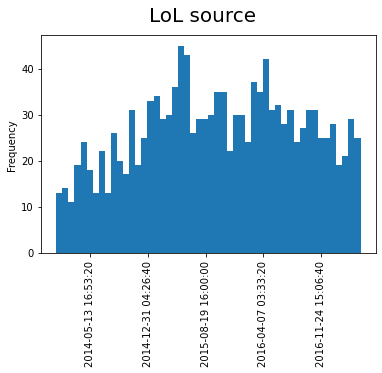

In [26]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('LoL source', fontsize=20)
plt.show()

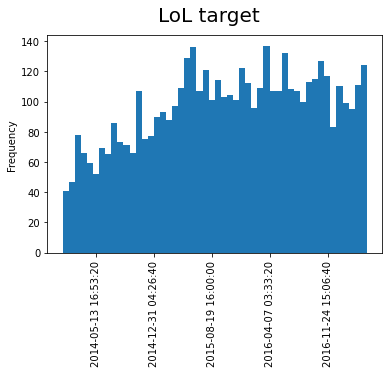

In [46]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('LoL target', fontsize=20)
plt.show()

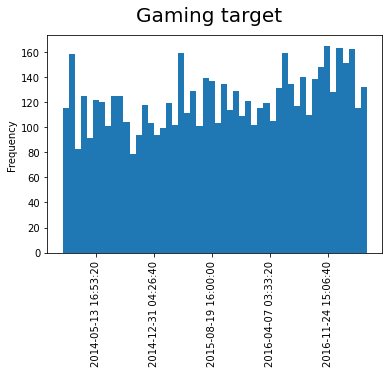

In [64]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('Gaming target', fontsize=20)
plt.show()

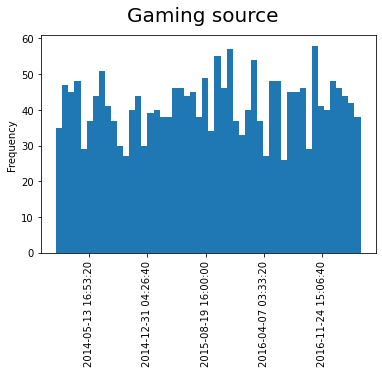

In [81]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('Gaming source', fontsize=20)
plt.show()

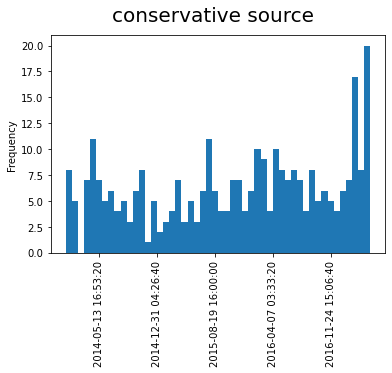

In [196]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('conservative source', fontsize=20)
plt.show()

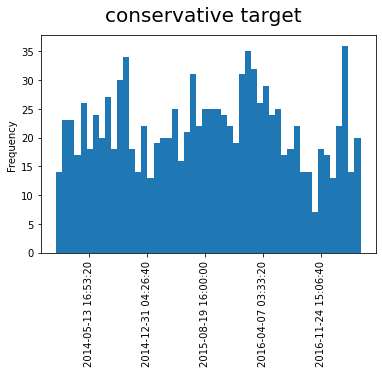

In [207]:
fig, ax = plt.subplots()
binwidth = 50
filtered_newindex_df["time"].astype(np.int64).plot.hist(ax=ax, bins = 50)
labels = ax.get_xticks().tolist()
labels = pd.to_datetime(labels)
ax.set_xticklabels(labels, rotation=90)
fig.suptitle('conservative target', fontsize=20)
plt.show()